In [1]:
import utilities as u

In [2]:
import pathlib

import yaml

import numpy as np

import itertools

In [3]:
from pixell import enmap, utils as putils

In [4]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

csfont = {'fontname':'Latin Modern Roman'}
font = font_manager.FontProperties(family='Latin Modern Roan',
                                   style='normal', size = 8)


## Plot corr coeff tsz cib

In [11]:
directory = '../extract_sehgal/LensQuEst-1/'
path = pathlib.Path(directory)
path

PosixPath('../extract_sehgal/LensQuEst-1')

In [12]:
getfactor = lambda l: l*(l+1)/(2*np.pi)

In [13]:
fname = 'all_fgs_tsz_cib_cross_ksz_radio.txt'
lCen, ftsz, fcib, ftszcib, fksz, fradio = np.loadtxt(path/fname, unpack = True)

In [24]:
fg148tsz = 0.
fg148cib = 0.
fg148tszcib = 0.

N = 80

for i in range(N):
    lbins, tsz_, cib_, tszcib_ = np.loadtxt(path/'out_txt'/f'tsz_cib_cross_{i}.txt', unpack = True)
    fg148tsz += tsz_
    fg148cib += cib_
    fg148tszcib += tszcib_
    
fg148tsz /= N
fg148cib /= N
fg148tszcib /= N

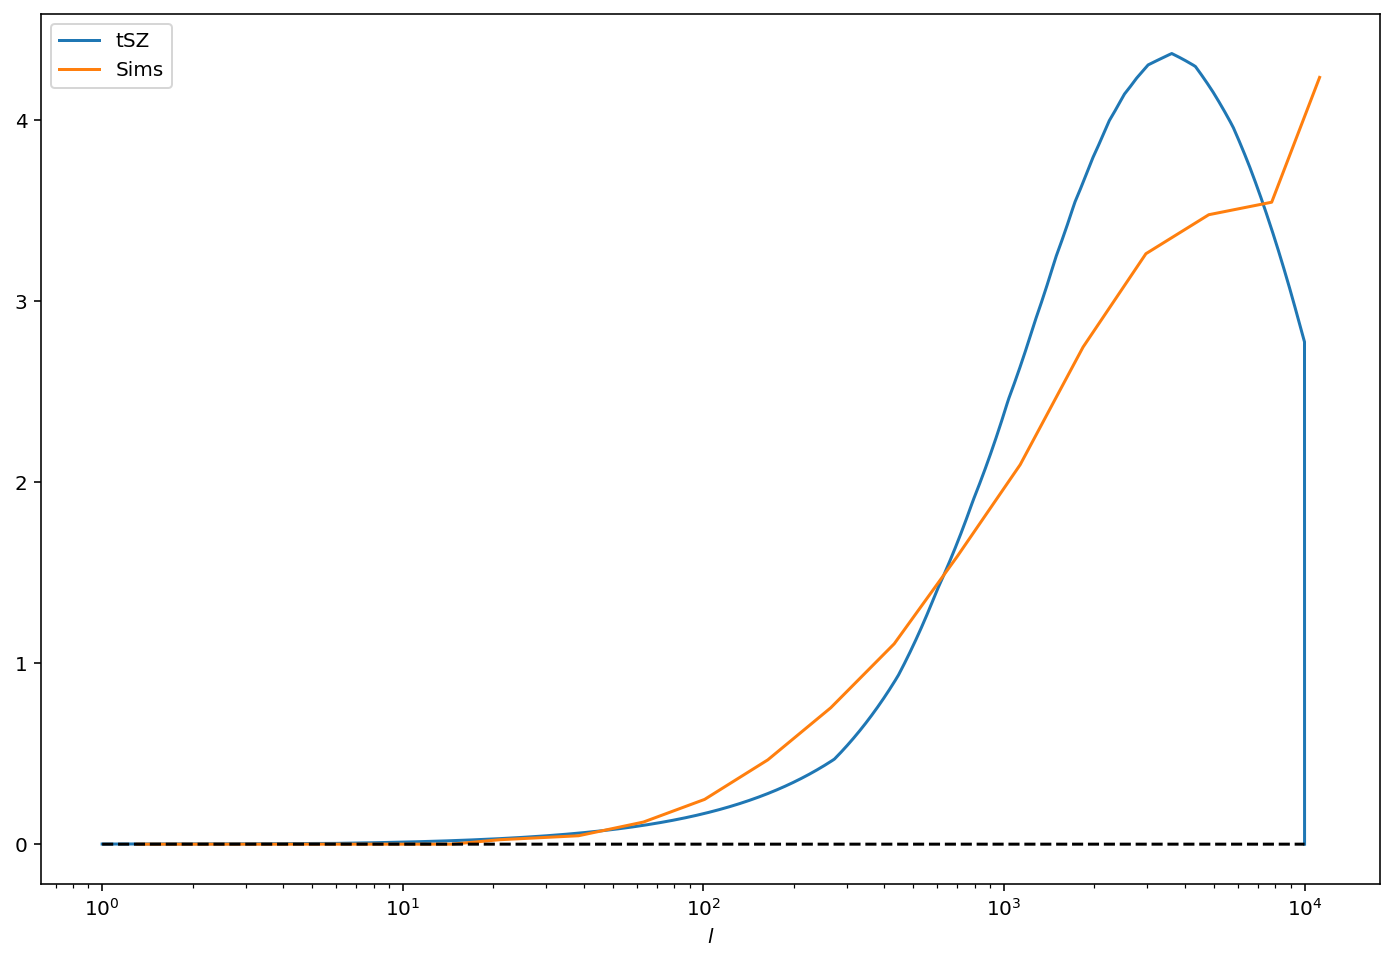

In [29]:
plt.plot(lCen, ftsz*getfactor(lCen), label = 'tSZ')
plt.plot(lbins, fg148tsz*getfactor(lbins), label = 'Sims')
plt.plot(lCen, lCen*0., color = 'black', ls = '--')
plt.xlabel('$C_l$')
plt.xlabel('$l$')
plt.legend()
plt.xscale('log')

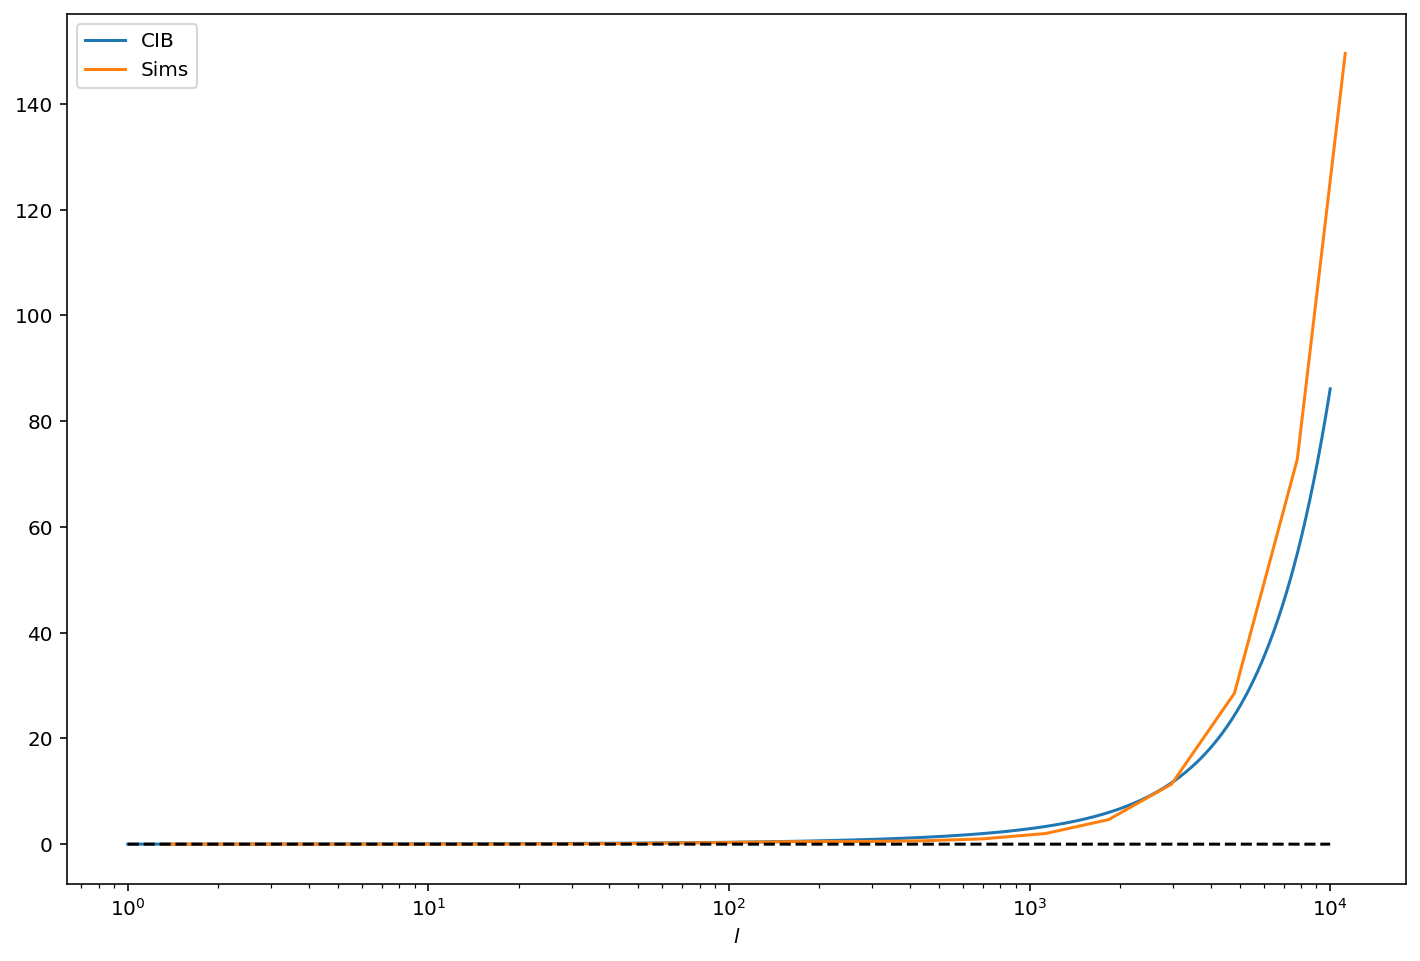

In [30]:
plt.plot(lCen, fcib*getfactor(lCen), label = 'CIB')
plt.plot(lbins, fg148cib*getfactor(lbins), label = 'Sims')
plt.plot(lCen, lCen*0., color = 'black', ls = '--')
plt.xlabel('$C_l$')
plt.xlabel('$l$')
plt.legend()
plt.xscale('log')

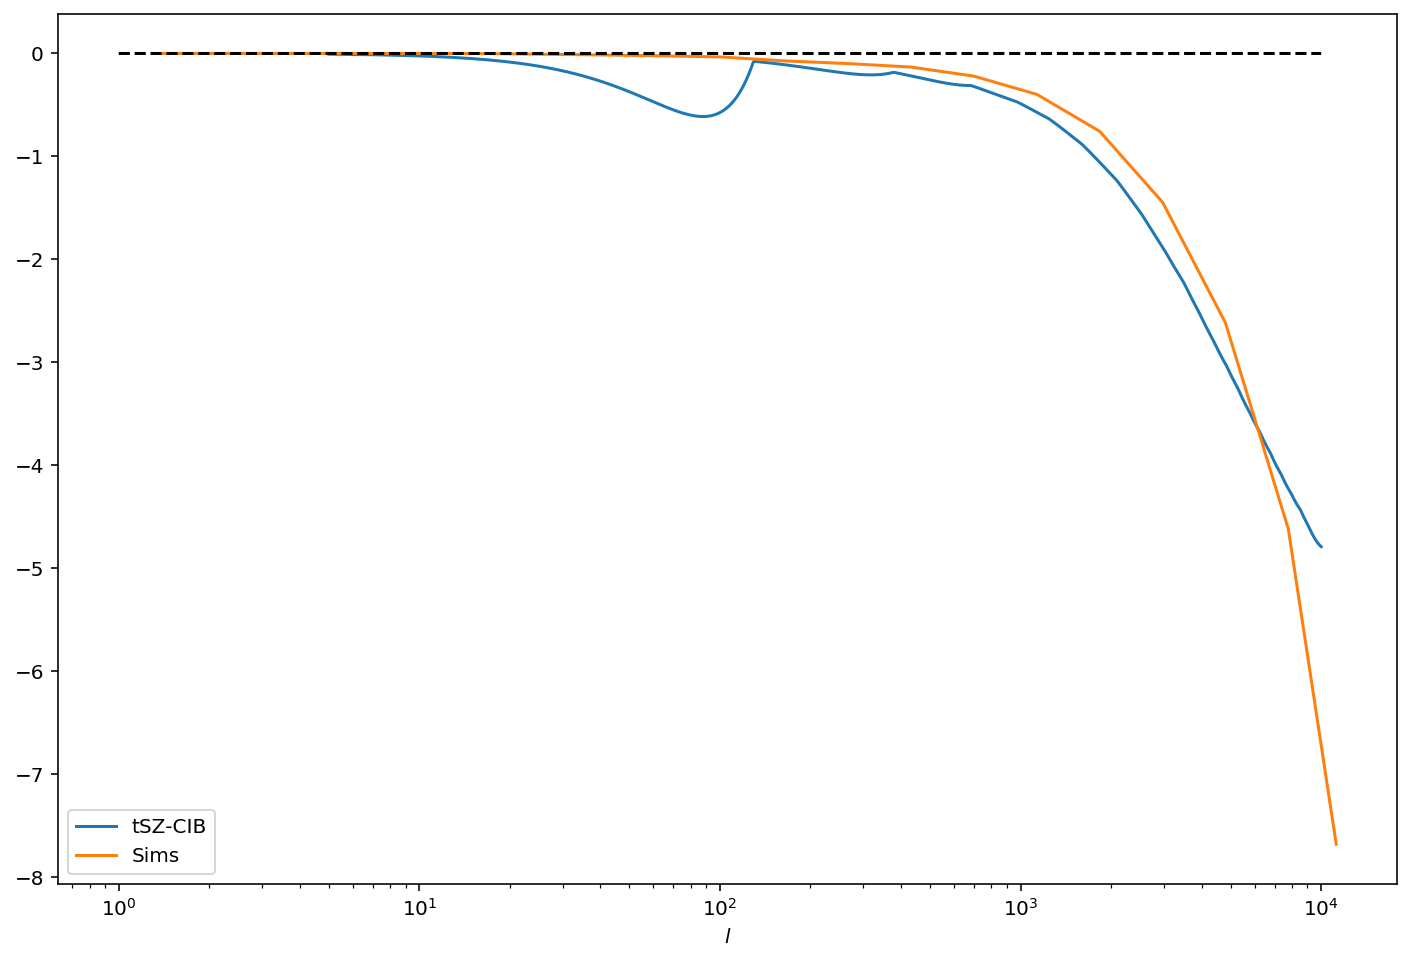

In [25]:
plt.plot(lCen, ftszcib*getfactor(lCen), label = 'tSZ-CIB')
plt.plot(lbins, fg148tszcib*getfactor(lbins), label = 'Sims')
plt.plot(lCen, lCen*0., color = 'black', ls = '--')
plt.xlabel('$C_l$')
plt.xlabel('$l$')
plt.legend()
plt.xscale('log')

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


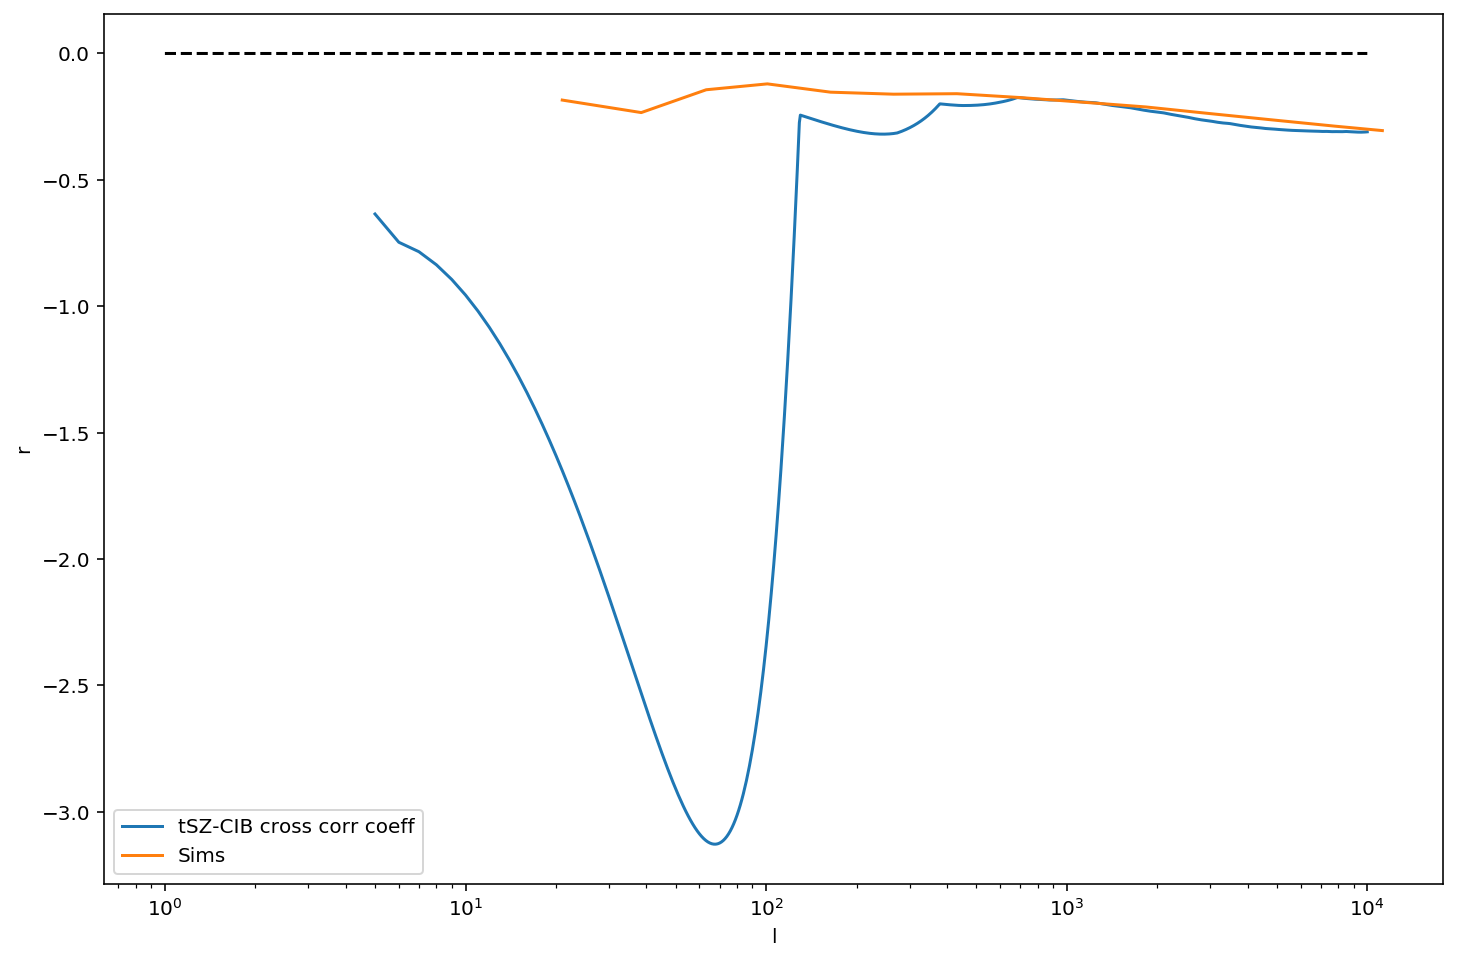

In [28]:
plt.plot(lCen, (ftszcib)/np.sqrt(ftsz*fcib), label = 'tSZ-CIB cross corr coeff')
plt.plot(lbins, fg148tszcib/np.sqrt(fg148tsz*fg148cib), label = 'Sims')
plt.plot(lCen, lCen*0., color = 'black', ls = '--')
plt.ylabel('r')
plt.xlabel('l')
plt.legend()
plt.xscale('log')

## CMB lensing level

In [139]:
ilc = False

In [140]:
values_file = 'configurations/config_ILC_fg_cross.yaml' if ilc else 'configurations/config_fg_cross.yaml' 
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [141]:
plots_directory = data['plotsdirectory']

analysis_directory = data['analysisdirectory']

savingdirectory = data['savingdirectory']

Nsims = data['Nsims']

results_directory = data['resultsdirectory']
spectra_path = data['spectra_path']
sims_directory = data['sims_directory']
WR = u.write_read(sims_directory)

PP = pathlib.Path(analysis_directory)
Pplots = pathlib.Path(plots_directory)

fgnamefilesA = data['fgnamefiles']
fgnamefilesB = data['fgnamefiles_second_list']

estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())


lista_lmaxes = []

names = {}

for e in estimators:
    elemento = estimators_dictionary[e]
    names[e] = elemento['direc_name']
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))


#CHOOSE nu
nu = estimators_dictionary[estimators[0]]['nu']

In [146]:
direc = 'h3500s3500b3500sy3500' if ilc else 'h3500s3500b3500'
dictionary = u.dictionary(savingdirectory, direc)

In [147]:
tags = ['T', 'P', 'S']

In [148]:
fgnamefilesA+fgnamefilesB

['cib', 'tsz']

In [149]:
allcombs = list(itertools.combinations_with_replacement(fgnamefilesA+fgnamefilesB, 2))
allcombs

[('cib', 'cib'), ('cib', 'tsz'), ('tsz', 'tsz')]

In [150]:
colors = {}
colors[allcombs[0]] = 'blue'
colors[allcombs[2]] = 'red'
colors[allcombs[1]] = 'orange'

In [151]:
P = u.Plotting('', 30, 1200, xscale = 'log')

In [152]:
estimators

['hu_ok', 'shear', 'bh']

In [153]:
estimators_to_plot = estimators#[estimators[-1]]

In [154]:
getlab = lambda A, B: f'{A}-{B}' if A == B else f'{A}+{B}'

In [155]:
def getselected(p, ells, lmin, lmax):
    selection = (ells>lmin) & (ells < lmax)
    return p[selection]

In [156]:
allcombs

[('cib', 'cib'), ('cib', 'tsz'), ('tsz', 'tsz')]

cib
cib-tsz
tsz


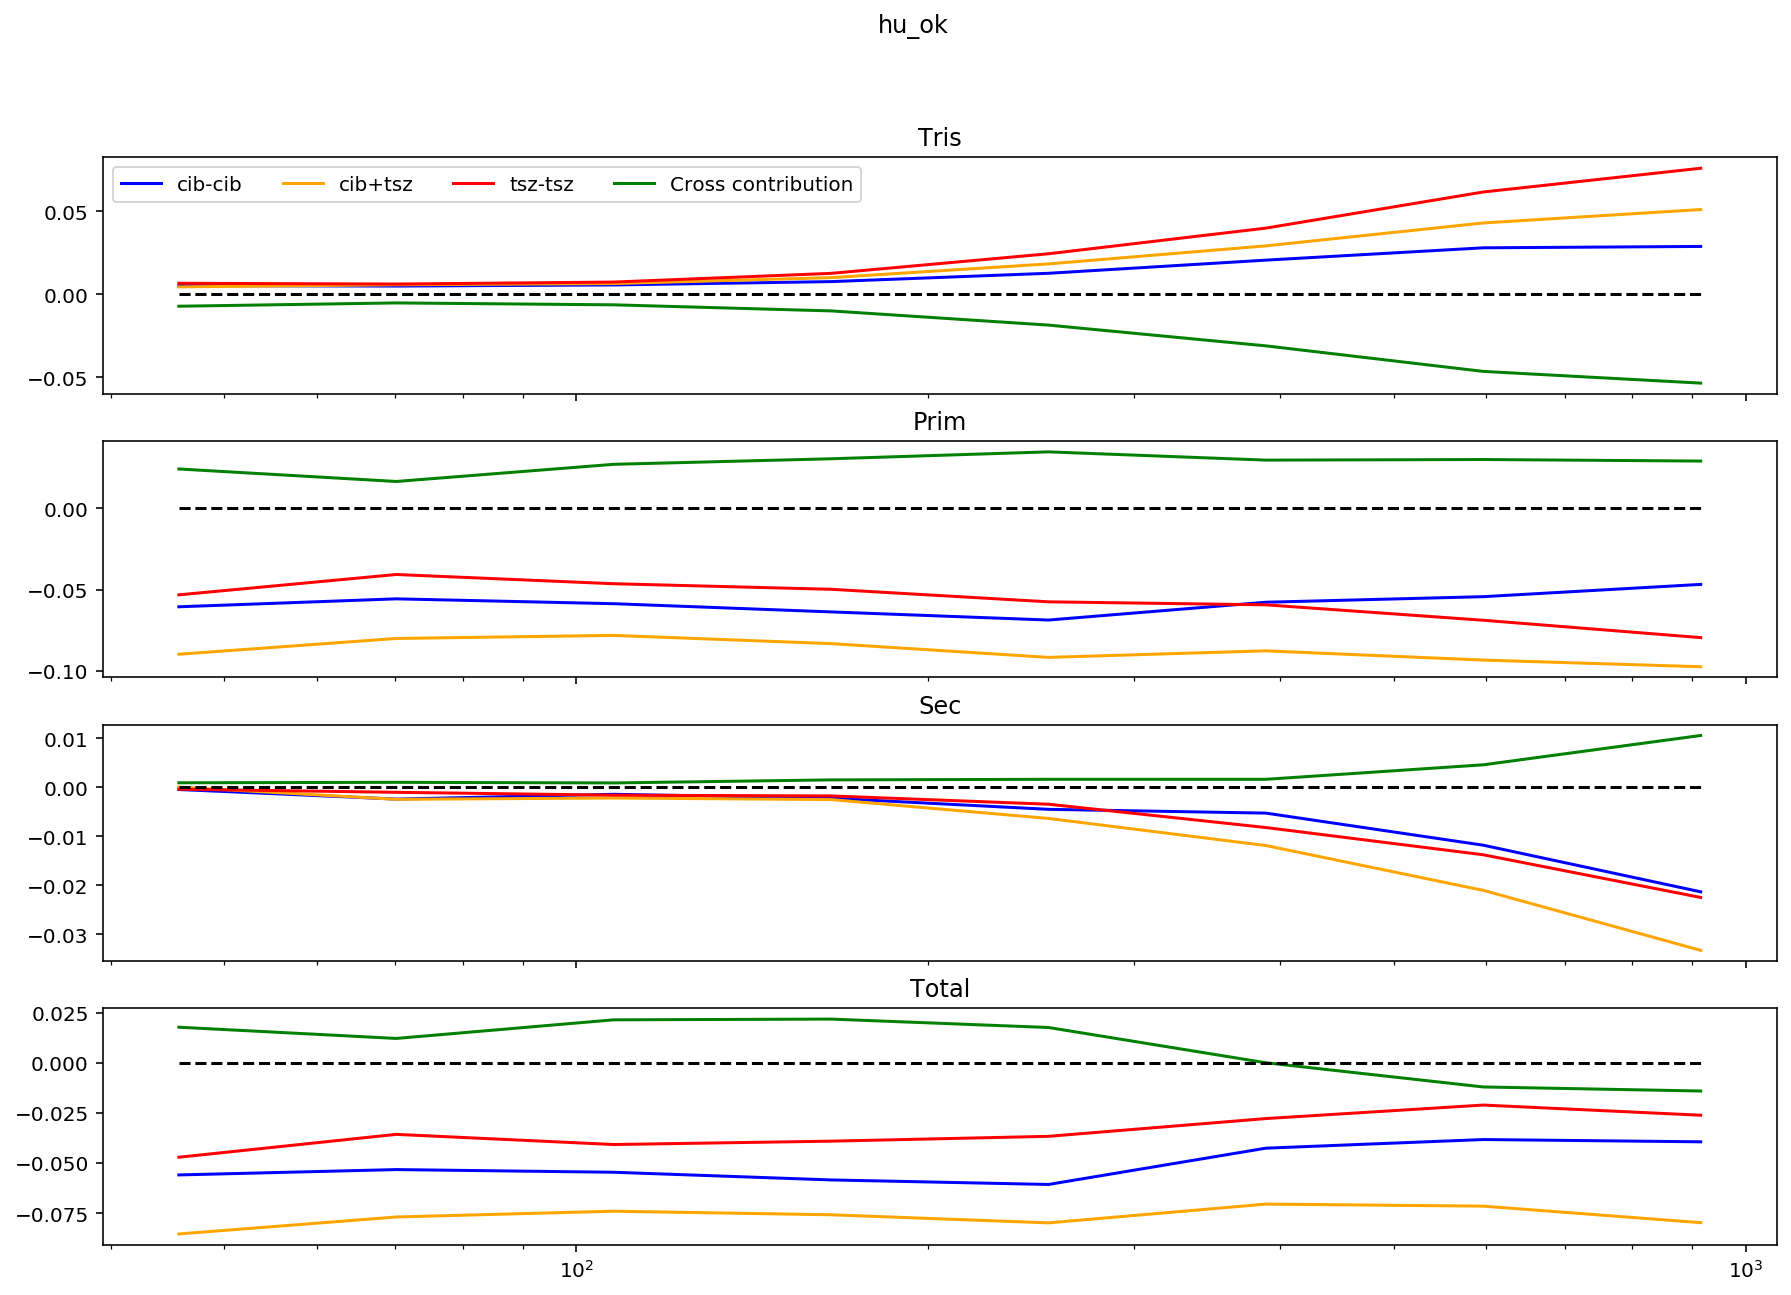

cib
cib-tsz
tsz


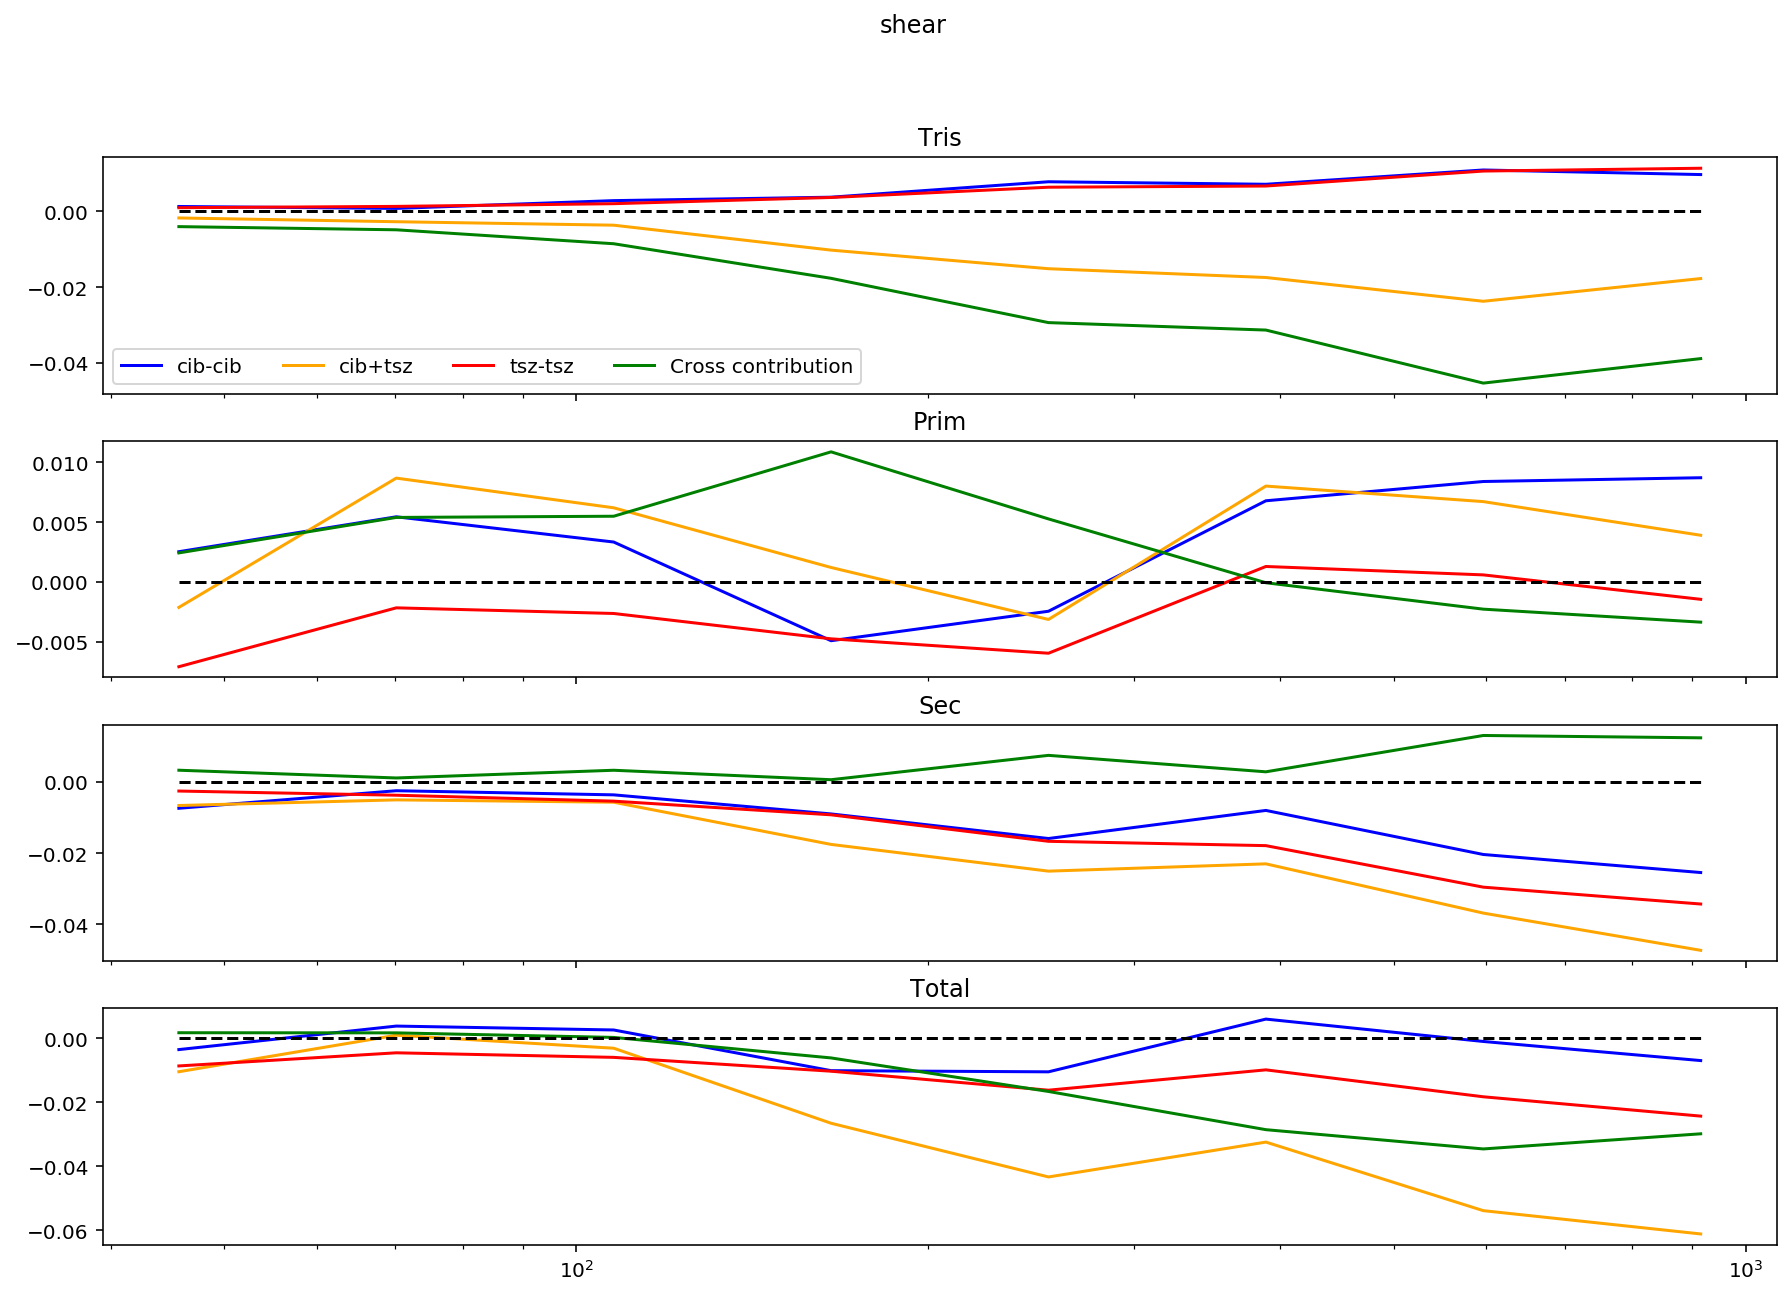

cib
cib-tsz
tsz


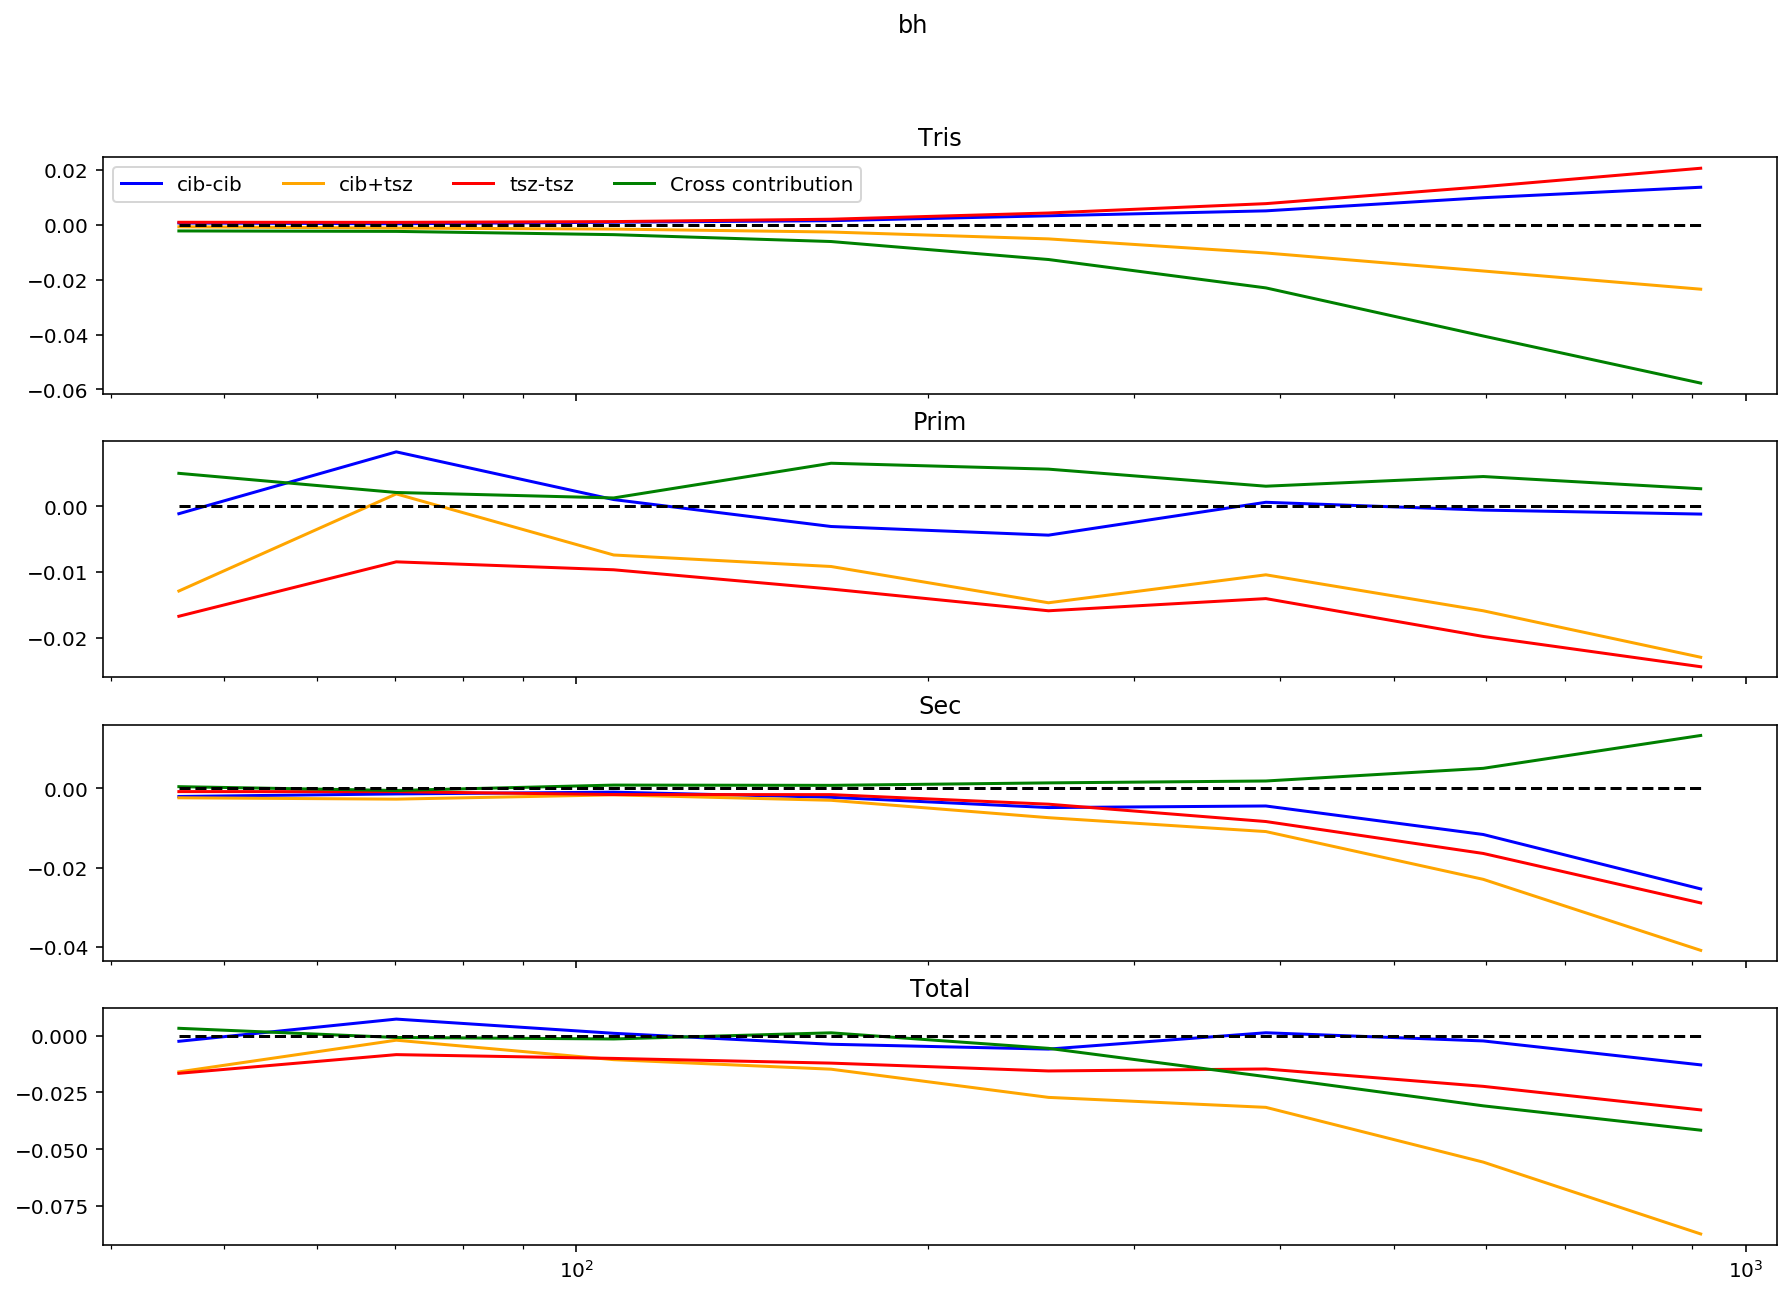

In [157]:
for est in estimators_to_plot:
    
    totalkk = 0.

    totals = {}
    
    tris = {}
    prims = {}
    secs = {}

    for A, B in allcombs:
        stringa = f'{A}-{B}' if A != B else f'{A}'
        total = 0.
        totaltstemp = {}
        for t in tags:
            totaltstemp[t] = 0.   
        print(stringa)
        for j in range(Nsims):      
            dic = dictionary.read(f'{stringa}_{nu}_{j}')
            for t in tags:
                total += dic[t][f'{t}-{est}-{est}']
                totaltstemp[t] += dic[t][f'{t}-{est}-{est}']
            
            totalkk += dic['kk']
            
        for t in tags:
            totaltstemp[t] /= Nsims
            
        tris[A+B] = totaltstemp[tags[0]]
        prims[A+B] = totaltstemp[tags[1]]
        secs[A+B] = totaltstemp[tags[2]]
        
        total /= Nsims
        totalkk /= Nsims
        totals[A+B] = total
        
    ells = dic['ells']
    
    fig, ax = plt.subplots(4, sharex = True, figsize = (15, 10))
    
    fig.suptitle(est)
    
    getselected_function = lambda p: getselected(p, ells, 30, 1200)
    
    
    def plot_dict(d, axspec, title):
        crosspart = 0.
        axspec.set_title(title)
        for A, B in allcombs:
            element = d[A+B]
            crosspart += element if A != B else -element 
            axspec.plot(getselected_function(ells), getselected_function(element/totalkk), label = getlab(A, B), color = colors[(A, B)])

        axspec.plot(getselected_function(ells), getselected_function(crosspart/totalkk), label = 'Cross contribution', color = 'green')
        axspec.plot(getselected_function(ells), getselected_function(ells)*0, ls = '--', color = 'black')
    
    plot_dict(tris, ax[0], 'Tris')
    
    plot_dict(prims, ax[1], 'Prim')
    
    plot_dict(secs, ax[2], 'Sec')
    
    plot_dict(totals, ax[3], 'Total')
    
    '''
    crosspart = 0.
    ax[0].set_title('Tris')
    for A, B in allcombs:
        element = tris[A+B]
        crosspart += element if A != B else -element 
        ax[0].plot(getselected_function(ells), getselected_function(element/totalkk), label = getlab(A, B), color = colors[(A, B)])
    ax[0].plot(getselected_function(ells), getselected_function(crosspart/totalkk), label = 'Cross contribution', color = 'green')
    '''
    
    ax[0].set_xscale('log')
    ax[0].legend(ncol = 4)
    
    '''
    ax[1].set_title('Prim')
    for A, B in allcombs:
        ax[1].plot(getselected_function(ells), getselected_function(prims[A+B]/totalkk), label = getlab(A, B), color = colors[(A, B)])
    ax[1].plot(getselected_function(ells), getselected_function(ells)*0, ls = '--', color = 'black')
        
    ax[2].set_title('Sec')
    for A, B in allcombs:
        ax[2].plot(getselected_function(ells), getselected_function(secs[A+B]/totalkk), label = getlab(A, B), color = colors[(A, B)])
    ax[2].plot(getselected_function(ells), getselected_function(ells)*0, ls = '--', color = 'black')
    
    ax[3].set_title('Tot')
    for A, B in allcombs:
        ax[3].plot(getselected_function(ells), getselected_function(totals[A+B]/totalkk), label = getlab(A, B), color = colors[(A, B)])
    ax[3].plot(getselected_function(ells), getselected_function(ells)*0, ls = '--', color = 'black')
    '''
    
    plt.show()